In [95]:
import numpy as np 
import matplotlib.pyplot as plt

Generate a function $Y(x)$ and its derivative $\nabla Y(x)$.

In [96]:
N = 2*4096

x,dx = np.linspace(-np.pi,np.pi,N,retstep=True)

#k = 2
#Y = lambda x : np.cos(k*x)
#dY2= lambda x : (-k*np.sin(k*x))**2

a = np.random.randn(10)
Y = lambda x : np.sum([  a_i*np.cos(i*x)     for i,a_i in enumerate(a)],axis=0)
dY2= lambda x : np.sum([-i*a_i*np.sin(i*x)   for i,a_i in enumerate(a)],axis=0)**2



Plot their graphs

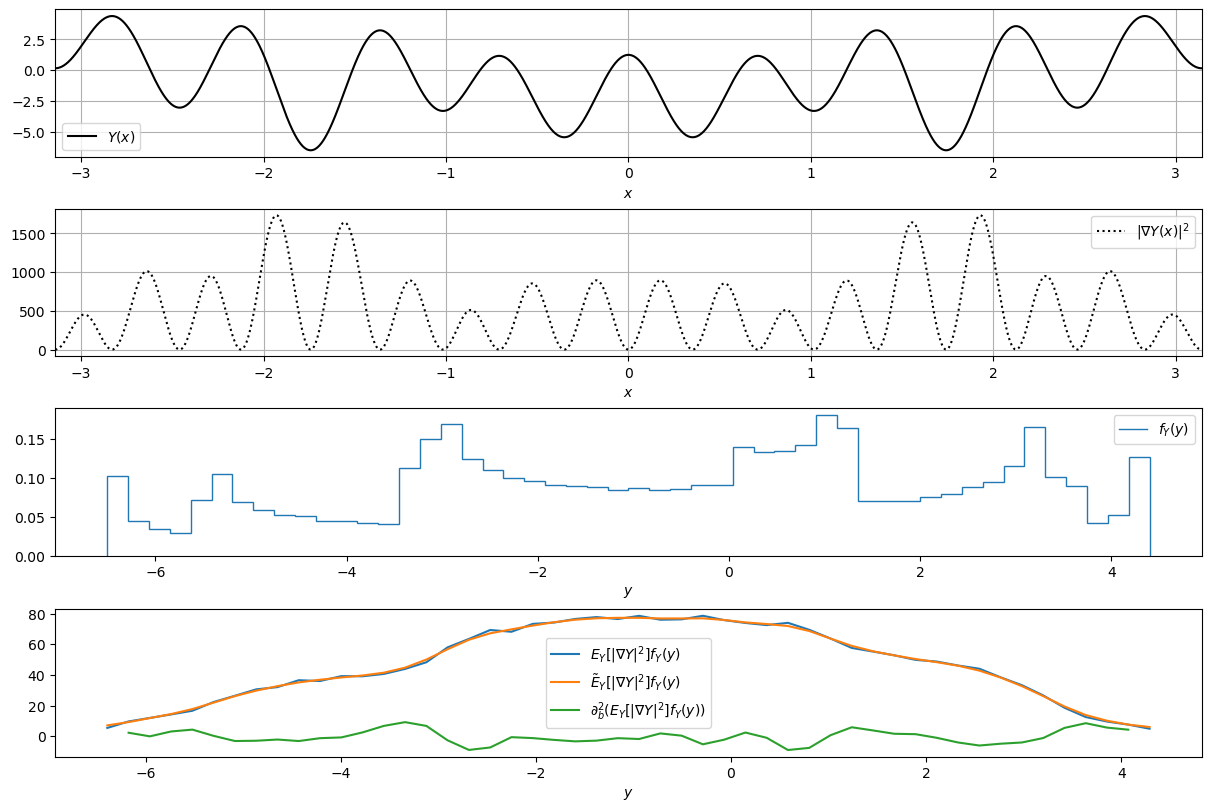

In [97]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12,8),layout='constrained')

ax[0].plot(x,Y(x),'k-',label=r'$Y(x)$')
ax[0].grid()
ax[0].set_xlabel(r'$x$')
ax[0].legend()
ax[0].set_xlim([-np.pi,np.pi])

ax[1].plot(x,dY2(x),'k:',label=r'$|\nabla Y(x)|^2$')
ax[1].grid()
ax[1].set_xlabel(r'$x$')
ax[1].legend()
ax[1].set_xlim([-np.pi,np.pi])

N_bins = 50
f_Y, y_edges = np.histogram(Y(x).flatten(), bins=N_bins, density=True)
ax[2].stairs(f_Y, y_edges,label=r'$f_Y(y)$')
ax[2].set_xlabel(r'$y$')
ax[2].legend()


f_YΦ,y_edges,φ_edges = np.histogram2d(Y(x).flatten(),dY2(x).flatten(),bins=N_bins,density=True)
y = (y_edges[1:] + y_edges[:-1])/2
φ = (φ_edges[1:] + φ_edges[:-1])/2
dφ = φ[1] - φ[0]

# E{Φ|X} = int f_Φ|X(φ|x)*φ dφ = int f_ΦX(φ,x)*φ dφ / f_X(x)

# E{Φ|X}*f_X(x) = int f_ΦX(φ,x)*φ dφ

f_Y = np.sum(  f_YΦ*dφ, axis=1)
E_Y_by_f_Y = np.sum(np.outer(np.ones(N_bins),φ)*f_YΦ*dφ, axis=1)
E_Y = E_Y_by_f_Y/f_Y
#ax[3].plot(y,E_Y, label=r'$E_Y[|\nabla Y|^2]$')
ax[3].plot(y,E_Y_by_f_Y,label=r'$E_Y[|\nabla Y|^2] f_Y(y)$')

from scipy.ndimage import gaussian_filter1d
E = gaussian_filter1d(E_Y_by_f_Y,sigma=1)

ax[3].plot(y,E,label=r'$\tilde{E}_Y[|\nabla Y|^2] f_Y(y)$')
ddb = np.zeros(N_bins)
for i in range(N_bins):
    if i > 0 and i < (N_bins -1):
        ddb[i] = (E[i+1] - 2*E[i] + E[i-1])/(y[1] - y[0])

ax[3].plot(y[1:-1],ddb[1:-1],label=r'$\partial^2_b( E_Y[|\nabla Y|^2] f_Y(y) )$')
ax[3].set_xlabel(r'$y$')
ax[3].legend()

plt.show()